## 1 - Importação

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


## 2 - Tratamento da base de dados.
Etapa 1: Adicionar coluna com nome da loja

In [19]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


Etapa 2: Concatenar todos os DataFrames

In [20]:
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)



Etapa 3: Verificar o DataFrame unificado

In [21]:
print(df.shape)
print(df.columns)
df.head()


(9435, 13)
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


## Analise 01
### Faturamento Acumulado

Passo 1: Adicionando uma columa de faturamento
- Estamos somando o Preço do produto com o Frete, pois ambos compõem o valor total que o cliente pagou.

In [25]:
df['Faturamento'] = df['Preço'] + df['Frete']

Passo 2: Faturamento total por loja
- Agrupa o DataFrame pela coluna "Loja" `df.groupby('Loja')`
- Depois de agrupar por loja, seleciona apenas a coluna de Faturamento dentro de cada grupo.`['Faturamento']`
- Soma todos os valores da coluna Faturamento dentro de cada loja `.sum()`
- Ordena os valores do maior para o menor. `.sort_values(ascending=False)`


In [26]:
faturamento_por_loja = df.groupby('Loja')['Faturamento'].sum().sort_values(ascending=False)
print(faturamento_por_loja)

Loja
Loja 1    1.616347e+06
Loja 2    1.567773e+06
Loja 3    1.542048e+06
Loja 4    1.458253e+06
Name: Faturamento, dtype: float64


Passo 3: Gráfico de barras

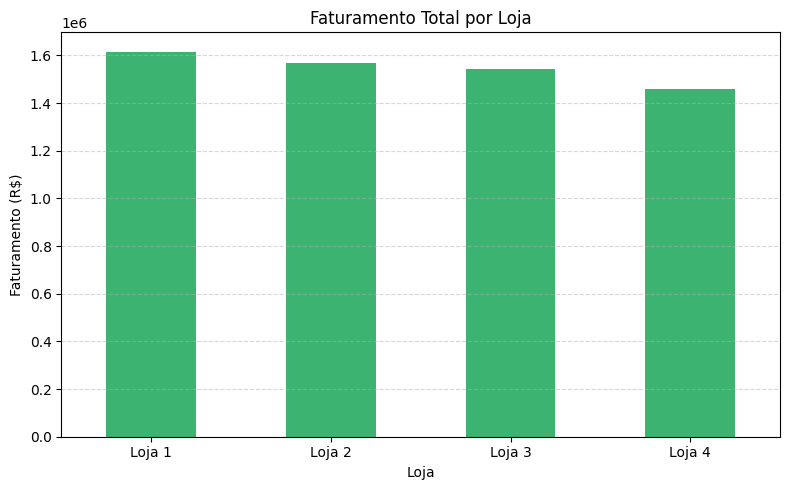

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
faturamento_por_loja.plot(kind='bar', color='mediumseagreen')

plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('../reports/images/Faturamento_Total_Loja.png')
plt.show()


## Analise 02
### Evolução Anual

Passo 1: Converter a coluna de data para formato datetime

Converter a coluna de data para formato datetime.
precisa dizer explicitamente que o dia vem antes do mês usando o parâmetro dayfirst=True. Pois o Pandas detectou datas no formato brasileiro (dd/mm/yyyy), mas está tentando ler como se fosse no formato americano (mm/dd/yyyy), que é o padrão do Pandas.

In [29]:
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

Passo 2: Criar uma coluna "Ano"

In [30]:
df['Ano'] = df['Data da Compra'].dt.year

Passo 3: Faturamento por Loja e Ano
DataFrame com 3 colunas: Loja, Ano, Faturamento.

In [31]:
faturamento_ano_loja = df.groupby(['Loja', 'Ano'])['Faturamento'].sum().reset_index()

In [33]:
faturamento_ano_loja.head()

,Loja,Ano,Faturamento
0,Loja 1,2020,518239.590196
1,Loja 1,2021,508456.330157
2,Loja 1,2022,444569.795904
3,Loja 1,2023,145081.371539
4,Loja 2,2020,450178.647673


Passo 4: Plotar gráfico (linha por loja ao longo dos anos)

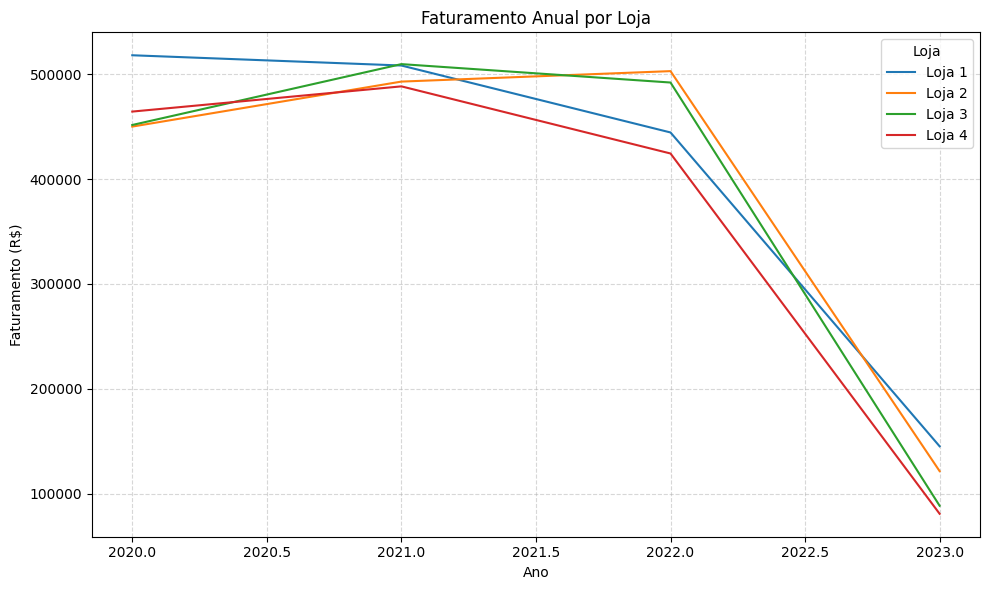

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for loja in faturamento_ano_loja['Loja'].unique():
    dados_loja = faturamento_ano_loja[faturamento_ano_loja['Loja'] == loja]
    plt.plot(dados_loja['Ano'], dados_loja['Faturamento'], label=loja)

plt.title('Faturamento Anual por Loja')
plt.xlabel('Ano')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Loja')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('../reports/images/Faturamento_Anual_Loja.png')
plt.show()


## Analise 03
### Faturamento médio por pedido (ticket médio)

Mostra quanto, em média, cada cliente gasta por compra em cada loja. Pode ajudar a entender se uma loja vende pouco, mas com valor alto, ou muito com valor baixo.

In [34]:
ticket_medio = df.groupby('Loja')['Faturamento'].mean().sort_values(ascending=False)

### Gráfico de barras

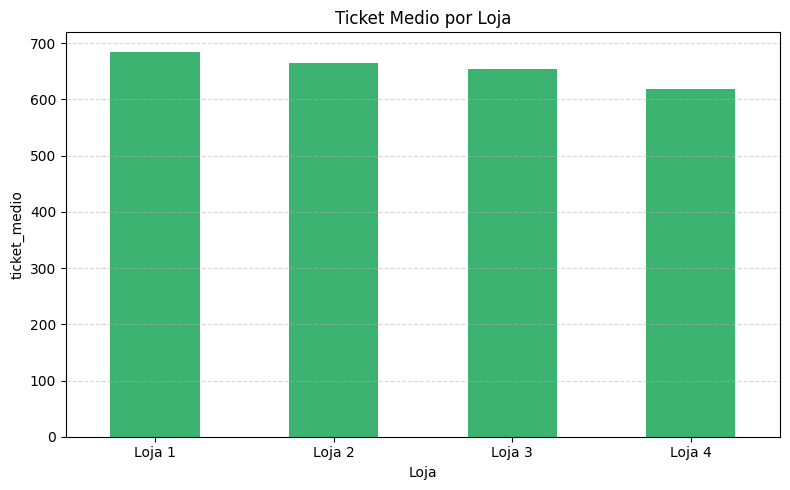

In [35]:
plt.figure(figsize=(8, 5))
ticket_medio.plot(kind='bar', color='mediumseagreen')

plt.title('Ticket Medio por Loja')
plt.ylabel('ticket_medio')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('../reports/images/Ticket_Medio_Loja.png')
plt.show()

### Avaliação média por loja
Mostra como os clientes avaliam a experiência geral em cada loja. Pode revelar uma loja que vende muito, mas tem baixa satisfação.

In [36]:
avaliacao_media = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

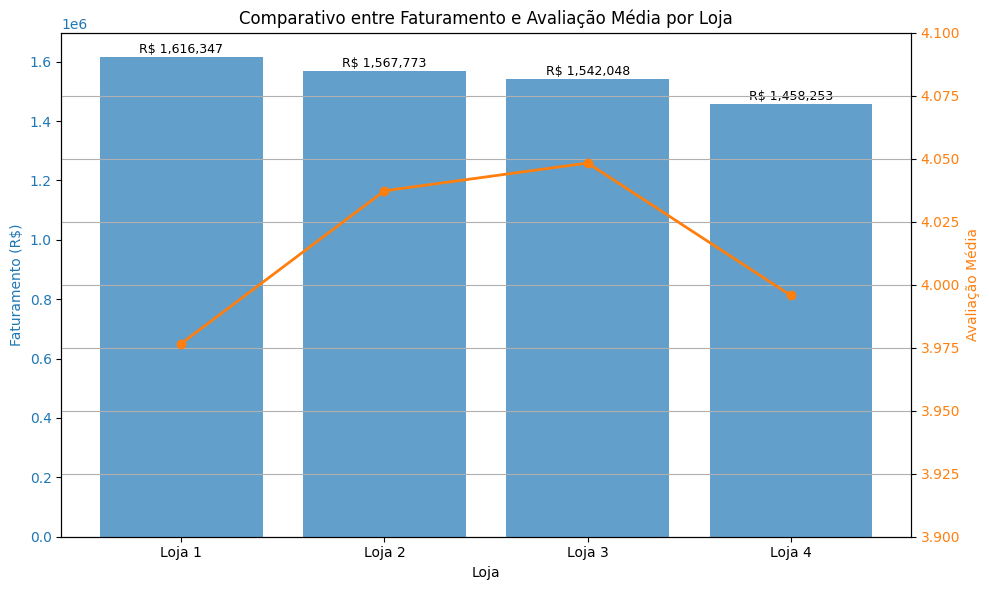

In [45]:
# Convertendo para DataFrame
df_comparativo = pd.DataFrame({
    'Faturamento (R$)': faturamento_por_loja,
    'Avaliação Média': avaliacao_media
})

# Ordenar por faturamento para visualização
df_comparativo = df_comparativo.sort_values(by='Faturamento (R$)', ascending=False)

# Plotando gráfico comparativo
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras de faturamento
color = 'tab:blue'
ax1.set_xlabel('Loja')
ax1.set_ylabel('Faturamento (R$)', color=color)
bars = ax1.bar(df_comparativo.index, df_comparativo['Faturamento (R$)'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'R$ {height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# Linha de avaliação média
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Avaliação Média', color=color)
ax2.plot(df_comparativo.index, df_comparativo['Avaliação Média'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(3.9, 4.1)

plt.title('Comparativo entre Faturamento e Avaliação Média por Loja')
plt.tight_layout()
plt.grid(True)
# plt.savefig('../reports/images/Comparativo_Faturamento_Avaliacao_Media_Loja.png')
plt.show()


# 2. Vendas por Categoria


## Análise de vendas por categoria (todas as lojas juntas)

<ipython-input-47-9862c91fa7a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='viridis')


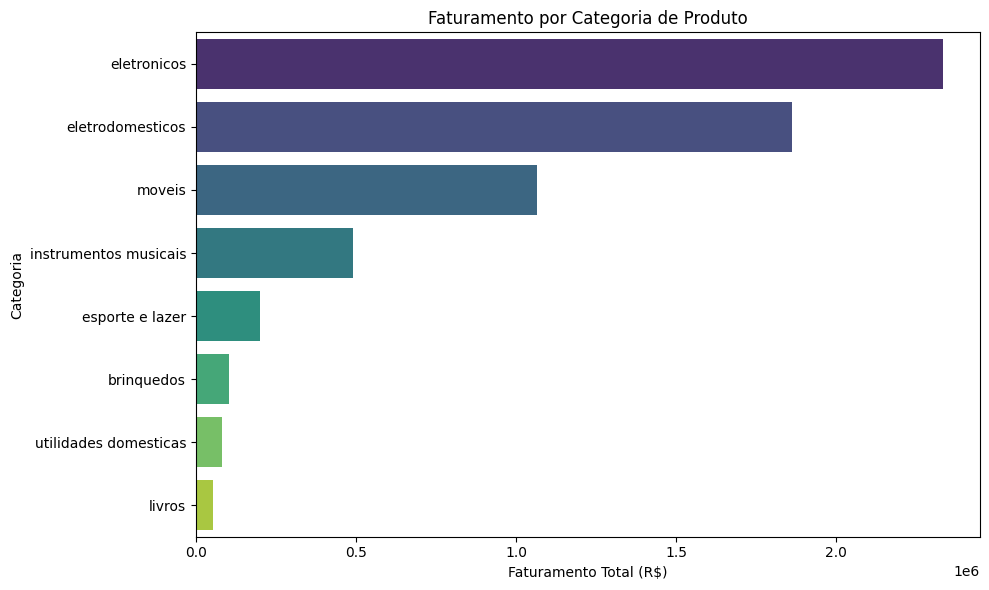

In [47]:
import seaborn as sns

# Agrupar o faturamento total por categoria de produto
vendas_por_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='viridis')
plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria')
plt.tight_layout()

# Salvando a imagem para o report
#plt.savefig('../reports/images/vendas_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()


## Análise: Vendas por Categoria separadas por Loja

<Figure size 1200x600 with 0 Axes>

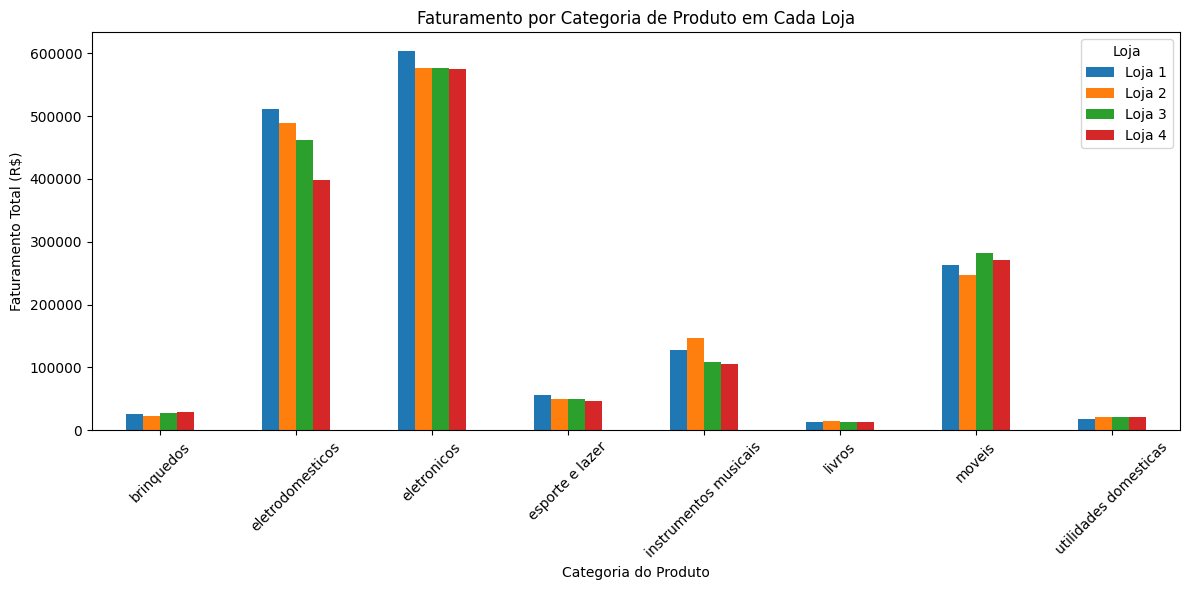

In [49]:
# Agrupando por Loja e Categoria, somando o faturamento
vendas_categoria_loja = df.groupby(['Loja', 'Categoria do Produto'])['Faturamento'].sum().reset_index()

# Pivotar o DataFrame para facilitar o gráfico
pivot = vendas_categoria_loja.pivot(index='Categoria do Produto', columns='Loja', values='Faturamento')

# Plotar o gráfico
plt.figure(figsize=(12, 6))
pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Faturamento por Categoria de Produto em Cada Loja')
plt.ylabel('Faturamento Total (R$)')
plt.xlabel('Categoria do Produto')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando imagem para o relatório
#plt.savefig('../reports/images/vendas_categoria_por_loja.png', dpi=300, bbox_inches='tight')
plt.show()


# 3. Média de Avaliação das Lojas

### Criar o gráfico de pizza
- O `autopct='%.2f★'` mostra a nota média com duas casas decimais e um ícone de estrelinha ⭐ pra ficar visualmente agradável
- Destacar a melhor e a pior loja visualmente, pode usar o parâmetro explode para "destacar" essas fatias da pizza.

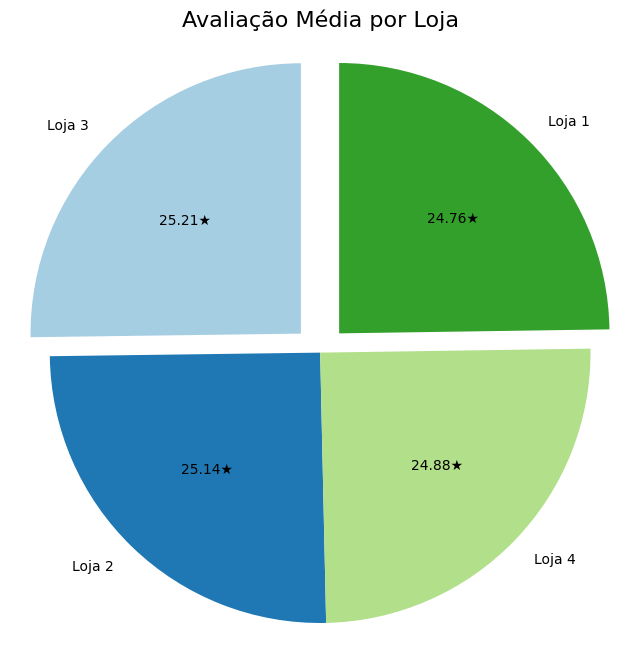

In [39]:
explode = [0.1 if i in [0, len(avaliacao_media)-1] else 0 for i in range(len(avaliacao_media))]

plt.figure(figsize=(8, 8))
# plt.pie(avaliacao_media, labels=avaliacao_media.index, autopct='%.2f★', startangle=90, colors=plt.cm.Paired.colors)
plt.pie(avaliacao_media, labels=avaliacao_media.index, autopct='%.2f★', startangle=90,
        colors=plt.cm.Paired.colors, explode=explode)
plt.title('Avaliação Média por Loja', fontsize=16)
plt.axis('equal')  # deixa o gráfico como um círculo
# plt.savefig('../reports/images/Avaliacao_Media_Loja.png')
plt.show()


boxplot de avaliações por loja:

<ipython-input-51-e5720134ec83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loja', y='Avaliação da compra', palette='Set2')


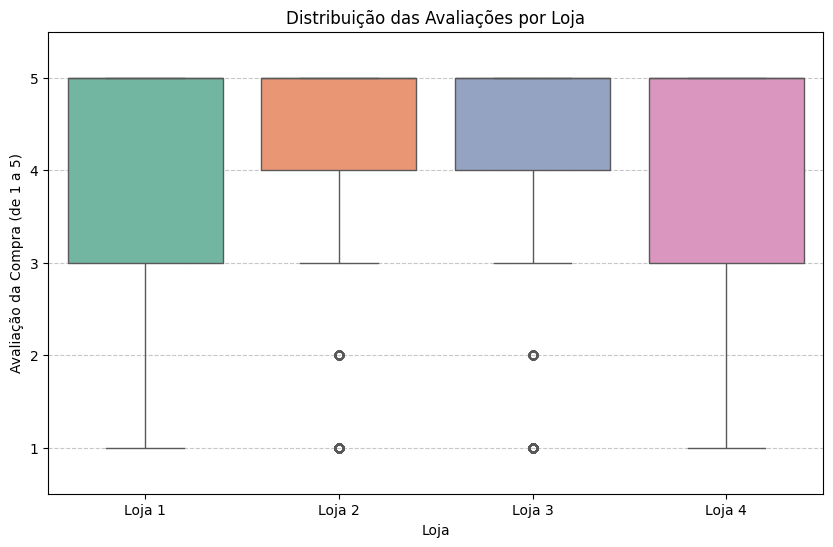

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Loja', y='Avaliação da compra', palette='Set2')

plt.title('Distribuição das Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação da Compra (de 1 a 5)')
plt.ylim(0.5, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Salvar gráfico
#plt.savefig('../reports/images/boxplot_avaliacoes_loja.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. Produtos Mais e Menos Vendidos

Top 10 produtos mais vendidos (geral)

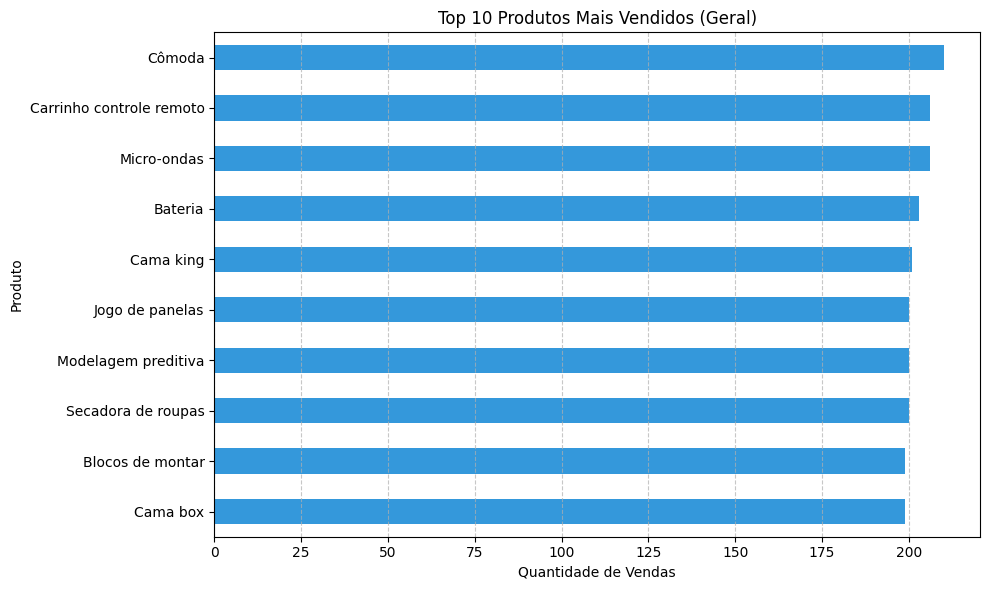

In [53]:
# Agrupar por Produto e somar a quantidade de vendas
mais_vendidos = df.groupby('Produto').size().sort_values(ascending=False).head(10)

# Plotar gráfico
plt.figure(figsize=(10, 6))
mais_vendidos.plot(kind='barh', color='#3498db')
plt.title('Top 10 Produtos Mais Vendidos (Geral)')
plt.xlabel('Quantidade de Vendas')
plt.gca().invert_yaxis()  # produto mais vendido no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Salvar gráfico
plt.tight_layout()
#plt.savefig('../reports/images/top10_produtos_geral.png', dpi=300)
plt.show()


Top 5 produtos mais vendidos por loja

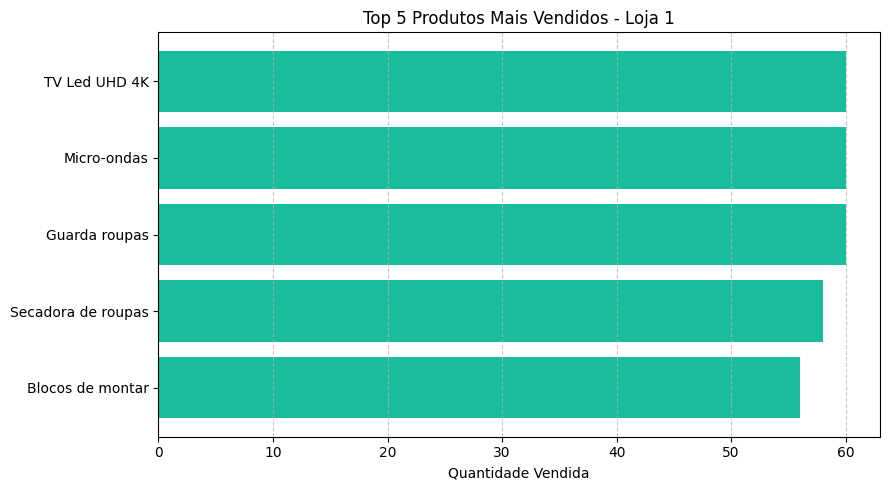

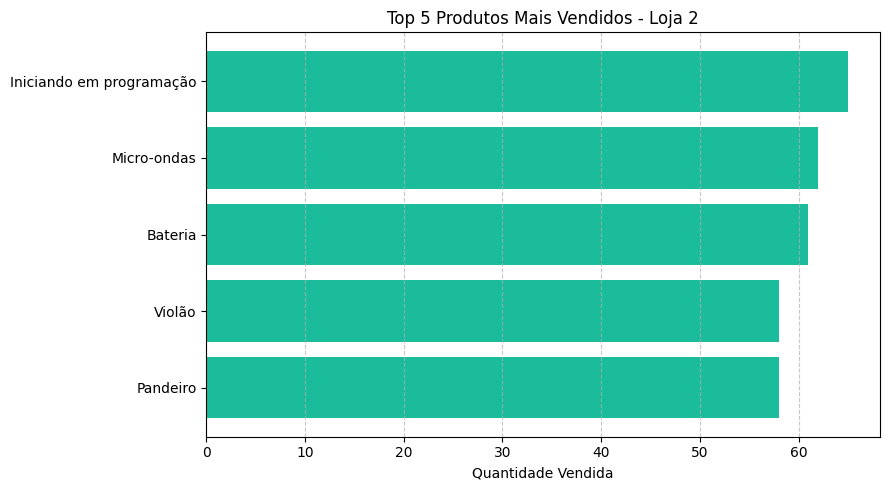

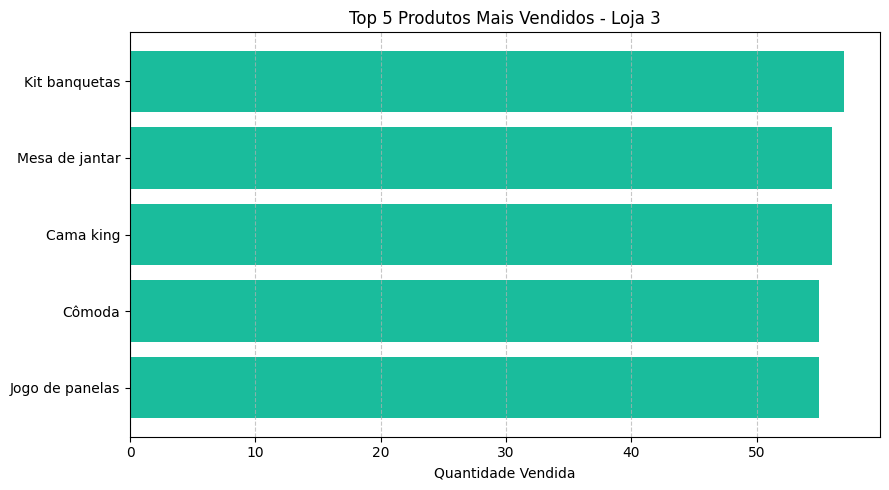

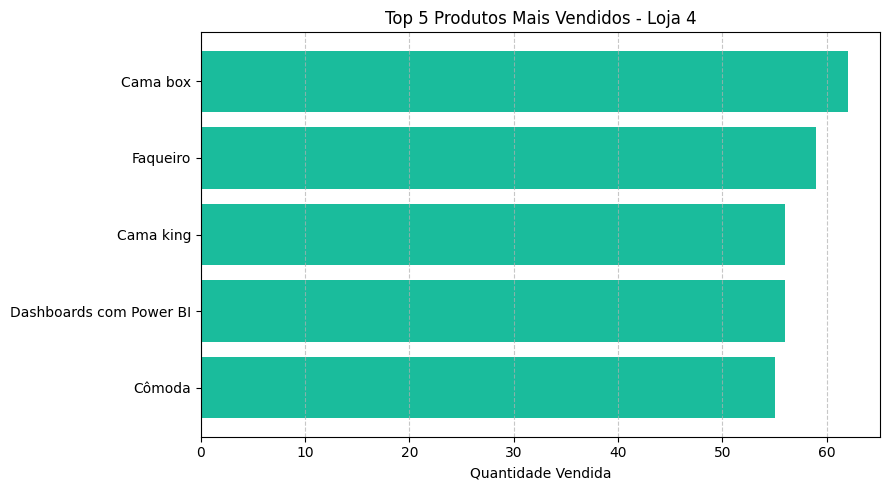

In [55]:
# Agrupar por Loja e Produto e contar quantas vezes foram vendidos
top_por_loja = df.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')

# Plotar por loja
lojas = df['Loja'].unique()

for loja in lojas:
    dados_loja = top_por_loja[top_por_loja['Loja'] == loja].sort_values(by='Quantidade', ascending=False).head(5)

    plt.figure(figsize=(9, 5))
    plt.barh(dados_loja['Produto'], dados_loja['Quantidade'], color='#1abc9c')
    plt.title(f'Top 5 Produtos Mais Vendidos - {loja}')
    plt.xlabel('Quantidade Vendida')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Salvar
    nome_arquivo = loja.lower().replace(" ", "_")
    plt.tight_layout()
    #plt.savefig(f'../reports/images/top5_produtos_{nome_arquivo}.png', dpi=300)
    plt.show()


# 5. Frete Médio por Loja


Código para calcular e plotar o frete médio:

Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


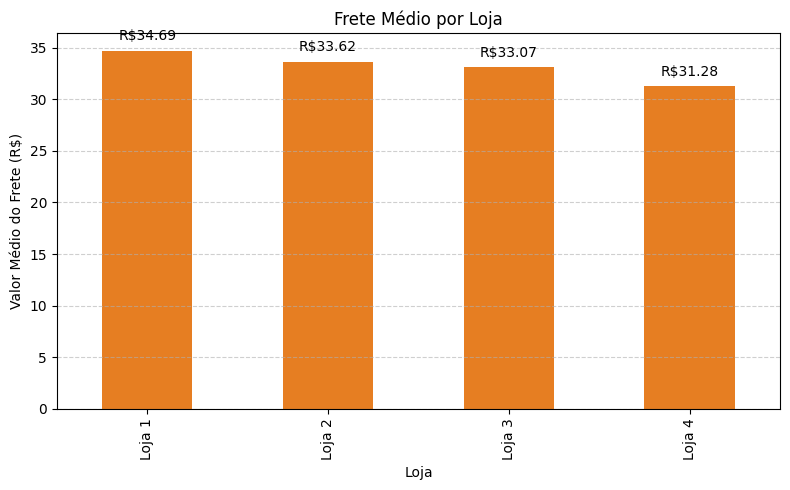

In [56]:
# Calcular o frete médio por loja
frete_medio_por_loja = df.groupby('Loja')['Frete'].mean().sort_values(ascending=False)

# Exibir valores
print(frete_medio_por_loja)

# Plotar gráfico
plt.figure(figsize=(8, 5))
frete_medio_por_loja.plot(kind='bar', color='#e67e22')

plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os valores no topo das barras
for i, valor in enumerate(frete_medio_por_loja):
    plt.text(i, valor + 1, f'R${valor:.2f}', ha='center')

# Salvar gráfico
plt.tight_layout()
#plt.savefig('../reports/images/frete_medio_por_loja.png', dpi=300)
plt.show()


Dispersão do Frete por Loja (Boxplot)

<ipython-input-57-94dfd1721691>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loja', y='Frete', palette='pastel')


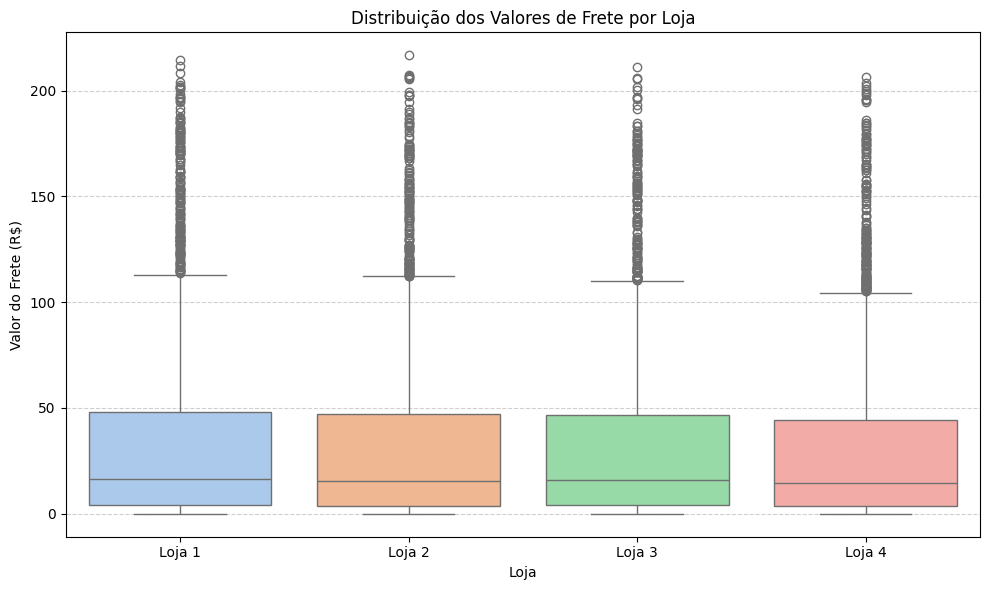

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Loja', y='Frete', palette='pastel')

plt.title('Distribuição dos Valores de Frete por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
#plt.savefig('../reports/images/boxplot_frete_por_loja.png', dpi=300)
plt.show()


Correlação entre frete e avaliação

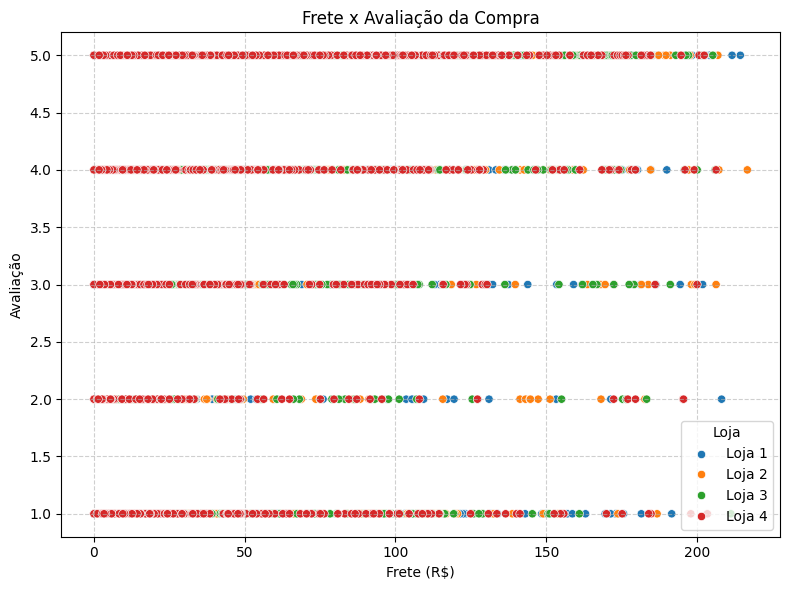

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Frete', y='Avaliação da compra', hue='Loja', palette='tab10')

plt.title('Frete x Avaliação da Compra')
plt.xlabel('Frete (R$)')
plt.ylabel('Avaliação')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
#plt.savefig('../reports/images/frete_vs_avaliacao.png', dpi=300)
plt.show()


## Frete médio por tipo de pagamento

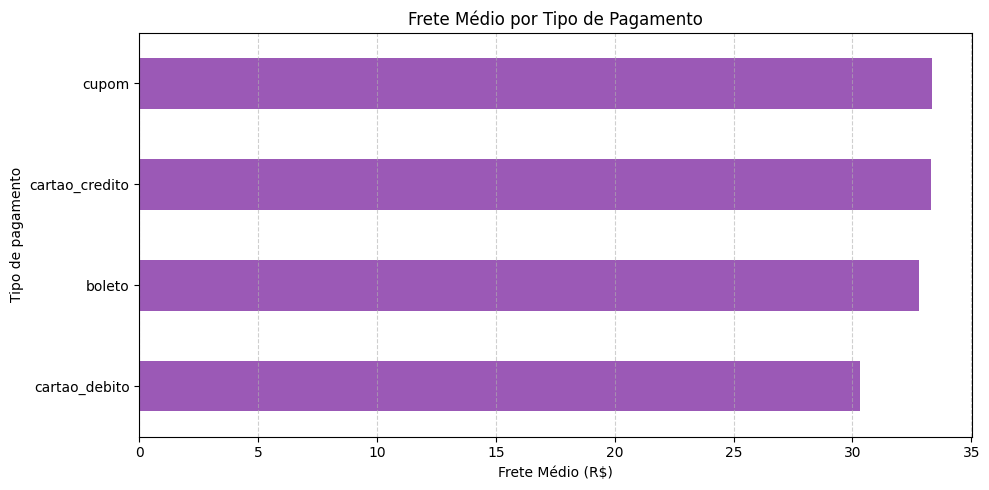

In [59]:
frete_por_pagamento = df.groupby('Tipo de pagamento')['Frete'].mean().sort_values()

plt.figure(figsize=(10, 5))
frete_por_pagamento.plot(kind='barh', color='#9b59b6')
plt.title('Frete Médio por Tipo de Pagamento')
plt.xlabel('Frete Médio (R$)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
#plt.savefig('../reports/images/frete_por_tipo_pagamento.png', dpi=300)
plt.show()
